# Matplotlib & Seaborn
* Matplotlib is data visualization tool
* Seaborn is statistical visualization tool

### Implicit functioning
The base of visualization in Matplotlib & Seaborn is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. Matplotlib/Seaborn create the Figure & Axes objects implicitly with each function automatically targeting a Figure or Axes that was most recently worked with. <br>
See the Figures, Axes, & Subplots section for the detailed inner-workings.

### Univariate 
* Univariate visualizations: Visualize single-variables, such as bar charts, histograms, and line charts.
* Bivariate visualizations: Plots representing the relationship between two variables measured on the given sample data. These plots help to identify the relationship pattern between the two variables.

### Terms
* Ordinal data: It is a categorical data type where the variables have natural and ordered categories. The distances between the categories are unknown, such as the survey options presented on a five-point scale.
* Nominal data: variables are "named" with no specific order & thus can be sorted by frequency

**Import modules**
* use numpy & pandas to store data
* use matplotlib & seaborn to create visualizations
 * may see sns used for seaborn but we're using sb
* use jupyter magic keyword to allow plots to be rendered inside the notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# allows plots to be rendered inside the notebook
%matplotlib inline

In [4]:
pokemon = pd.read_csv('./resources/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


# Bar Chart
* univarite plot type that depicts the distribution of a categorical/qualitative variable
* each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level
 * categories on x axis, frequency on y
 * horizontal bar chart is chart turned 90 degrees clockwise, which can be more convinient with long category 
 * for nominal data (variables "named" with no specific order), can sort bars by frequency with most commone on the left
* with ordinal data (ordered variables), don't sort by frequency
* to avoid information distortion, the baseline for the plot should start at zero
* plot is summarized by default in absolute frequency but can do relative frequency by using proportions

**Create Bar Chart using Matplotlib** <br>
matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)

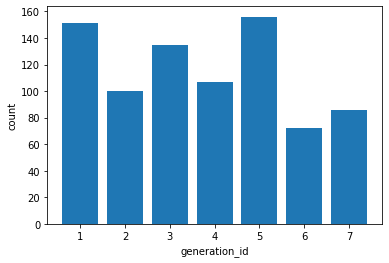

In [19]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

**Create Bar Chart using Seaborn** <br>
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None) <br>
* A semicolon at the end of the statement supresses printing the plotting info
* color param sets uniform color across bars. bars are multicolor by default. multicolor can be handy when building associations between larges sets of variables. otherwise, uniform color is less distracting
 * color_palette() function returns current/default palette as a list of RGB tuples consisting of three digits specifying the red, green, and blue channel values to specify a color
* order param takes a list in the order in which bars should be plotted. frequency sorting is good for nominal data
 * value_counts() function (for Series) gets frequency & sorts in descending order
  * to just get frequency count, use param sort=False)
* to order bars by variable (for ordinal data), can convert the column into an ordered categorical datatype (CategoricalDtype)

In [12]:
# get color
pal = sb.color_palette()
base_color = pal[0]

# get sorted frequency of column
gen_order = pokemon['generation_id'].value_counts().index

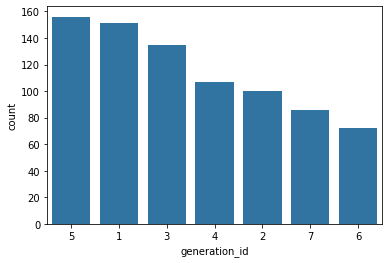

In [13]:
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

**Rotate Bar Chart Category Labels with Matplotlib** <br>
The category 'type_1' has verbose labels. To better read them, rotate them using MatPlotLib's xticks()

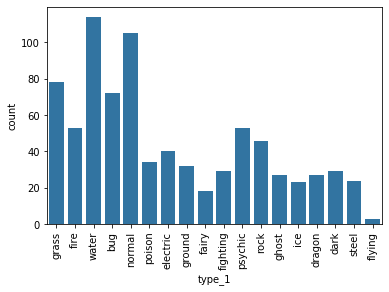

In [18]:
sb.countplot(data=pokemon, x='type_1', color=base_color);
plt.xticks(rotation=90);

**Rotate Bar Chart Axis** <br>
Use y instead of x param

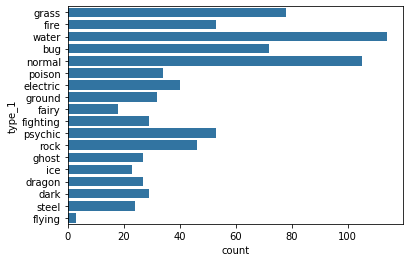

In [20]:
sb.countplot(data=pokemon, y='type_1', color=base_color);

**Create Bar Chart using Relative Frequency (percentages/proportions)** <br>
Absolute frequency (pure counts) is used by default, but sometimes you may want to see data in terms of the proportions to the whole by plotting data by relative frequency.

In [32]:
# use data wrangling to reshape the DataFrame so that type_1 & type_2 columns are combined
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)
#pkmn_types.shape

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [33]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [41]:
# Get the max proportion to space out ticks evenly

# Returns the sum of all not-null values in `type` column
n_pokemon = type_counts.sum()

# Return the highest frequency in the `type` column (water)
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [35]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [42]:
# Get all relative tick proportions by multiplying list by total #
r_props = tick_props * n_pokemon
print(r_props)

[  0.    24.24  48.48  72.72  96.96 121.2 ]


In [36]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

* xticks and yticks functions get and set their locations and labels
 * first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. 
 * second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

* xlabel call to label axis: in this case, makes clear that we're no longer working with straight counts.

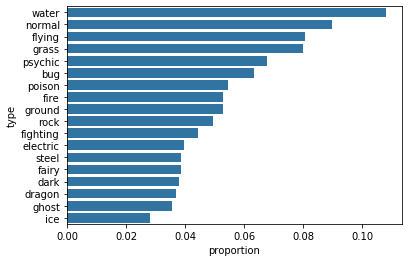

In [22]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
# Get base color to have uniform bar colors
base_color = sb.color_palette()[0]

# Plot the bar chart
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(r_props, tick_names)
# Add/Change axis label
plt.xlabel('proportion');

**Print text (relative frequency/proportions/percentages) on the bars of a horizontal plot with absolute frequency**

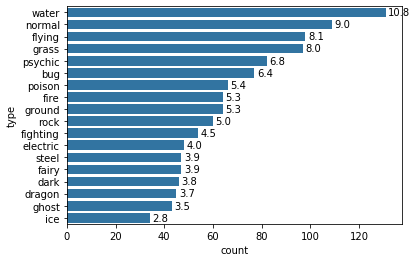

In [25]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

**Print text (relative frequency/proportions/percentages) above the bars of a vertical plot with absolute frequency**

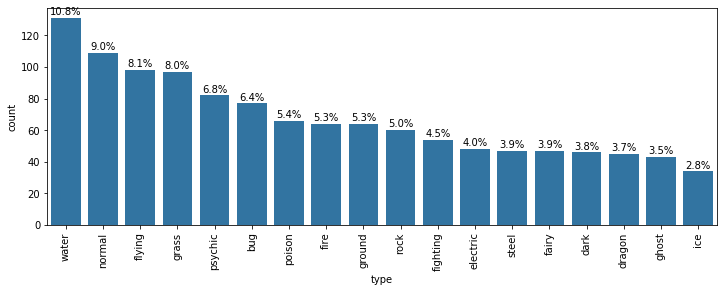

In [38]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

**Change size of plot for readability** <br>
Run plot after running this. The above plot has been altered

In [40]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

# Pie Chart
* univariate plot type that is used to depict relative frequencies for levels of a categorical variable. 
* Frequencies are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken. 
* Used in specific instances with low categories. See Guidelines below.
 * If these guidelines cannot be met, should probably do bar chart (generally safer choice) instead: bar heights are more precisely interpreted than areas or angles, bar charts can display more compactly, and there's more flexibility for plotting variables with a lot of levels (like plotting the bars horizontally)

### Guidelines
* Summarize relative frequencies: Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
* Limit the number of slices plotted: Works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. 
 * If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
* Plot data systematically: Typically, start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, it's common to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

**Create Pie Chart using Matplotlib** <br>
Need 2 functions:
1. matplotlib.pyplot.pie(x_data, labels, colors, startangle, counterclock, wedgeprops)
2. matplotlib.pyplot.axis(*args, emit=True, **kwargs)
 1. optionally accepts the axis limits in the form of xmin, xmax, ymin, ymax floats, and returns the updated values.
 2. the *args represents any number of arguments that you can pass to the function, whereas **kwargs stands for keyword arguments, generally passed in the form of a dictionary
 3. see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

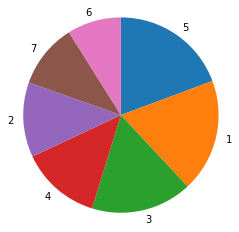

In [47]:
# Use the same pokemon dataset
sorted_counts = pokemon['generation_id'].value_counts()

# startangle & counterclock to start first slice vertically upwards & move counterclockwise
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# 'square' argument makes it so that the scaling of the plot is equal on both the x- and y-axes. 
# Without this call, the pie could end up looking oval-shaped, rather than a circle.
plt.axis('square')

**Create Donut Plot** <br>
* sister plot to the pie chart, except there's a hole in the center of the plot
 * should be used with the same guidelines as a pie chart
* used for aesthetics where you might see statistics reported in the hole of a donut plot to better make use of available space.
* created by adding wedgeprops arg to the pie function call. 
 * By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

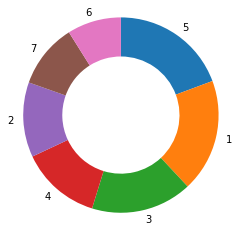

In [49]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

# Histograms
* used to plot the distribution of a numeric variable & emphasizes the fact that the data takes on a continuous range of values
* quantitative version of the bar chart. 
 * However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number
* can use either Matplotlib or Seaborn to plot the histograms
 * mild variation in the specifics, such as plotting gaussian-estimation line along with bars in Seabron's distplot(), and the arguments that you can use in either case.


### Bins
* When a data value is on a bin edge, it is counted in the bin to its right. 
 * The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).
 * when data points fall on set values (bar-width), it can help to reduce ambiguity by putting bin edges between the actual values taken by the data
* When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with the identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place

In [51]:
# display data we'll be working with & notice the speed column
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


**Create default Histogram with Matplotlib** <br>
default of 10 bins, which is usually too few to understand the distribution of data & the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

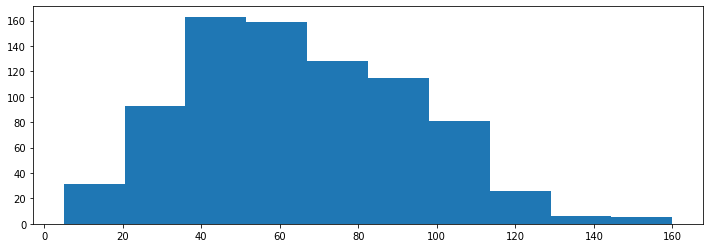

In [52]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.hist(data = pokemon, x = 'speed')

**Create fixed bins Histogram with Matplotlib** <br>
can use descriptive statistics (e.g. via dataframe['column'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot.

In [54]:
pokemon['speed'].describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

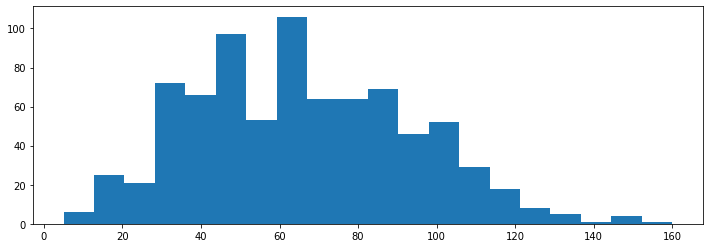

In [53]:
plt.hist(data = pokemon, x = 'speed', bins = 20)

**Create dynamic bins Histogram with Matplotlib** <br>
Bin edges can be set using numpy's arange function:
* first argument to arange is the leftmost bin edge
 * leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around() if you wanted to approach that end programmatically.
* second argument the upper limit
 * "+5" is added to the max (same length as the bin width) because arange is upper limit exclusive. Adding "+5" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. 
* third argument the bin width. 

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160]


(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

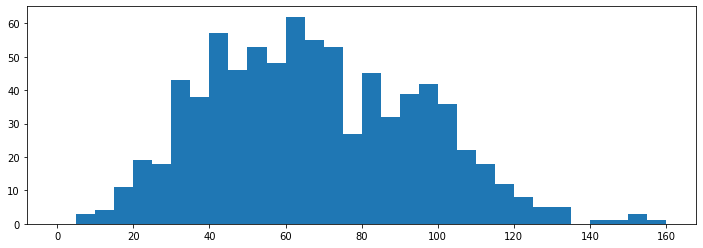

In [56]:
# Create bins with step-size 5
bins = np.arange(0, pokemon['speed'].max()+5, 5)
print(bins)
plt.hist(data = pokemon, x = 'speed', bins = bins)

**Create default Histogram using Seaborn** <br>
The distplot function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1
***
NOTE: From the Seaborn v0.11.0 onwards, this function is deprecated and will be removed in a future version. You can use either of the following two functions: displot() or histplot() to plot histograms using Seaborn

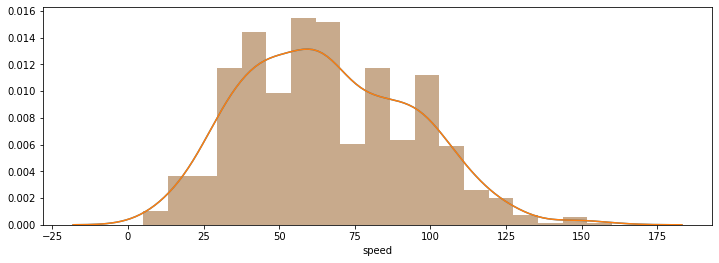

In [58]:
sb.distplot(pokemon['speed'])

# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.distplot(pokemon['speed'])
#sb.distplot(pokemon['speed'], kde=False)

**Create dynamic bins Histogram with Seaborn** <br>
Despite that the default bin-selection formula used by distplot might be better than the choice of ten bins that .hist uses, you'll still want to do some tweaking to align the bins to 'round' values. 

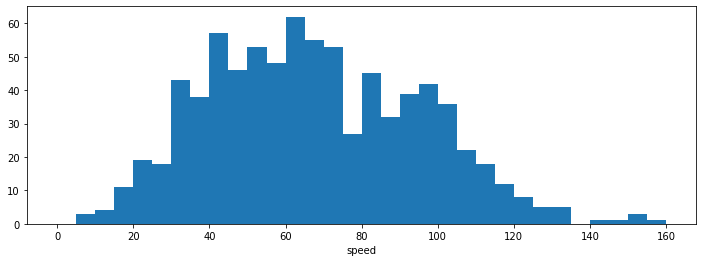

In [62]:
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)

# The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are 
# other underlying plotting functions, like the KDE, that have their own optional keyword parameters.
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

**Create KDE plot with Seaborn** <br>
* Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.
* Interpreting proportions from this plot type is slightly trickier than a standard histogram: the vertical axis indicates a density of data rather than straightforward proportions. Under a KDE plot, the total area between the 0-line and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values. Making area judgments like this without computer assistance is difficult and likely to be inaccurate.
 * displot() - A figure-level function with similar flexibility.
 * histplot() - An axes-level function for histograms.
* Despite the fact that making specific probability judgments are not as intuitive with KDE plots as histograms, there are still reasons to use kernel density estimation. If there are relatively few data points available, KDE provides a smooth estimate of the overall distribution of data. These ideas may not be so easily conveyed through histograms, in which the large discreteness of jumps may end up misleading.
* It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data. A too-small bandwidth can make the data look noisier than it really is, and a too-large bandwidth can smooth out useful features that we could use to make inferences about the data. It’s good to keep this in mind in case the default bandwidths chosen by your visualization software don’t look quite right or if you need to perform further investigations.

***
Note - The distplot() function is deprecated in Seaborn v 0.11.0, and will be removed in a future version. The alternative is either of the following:

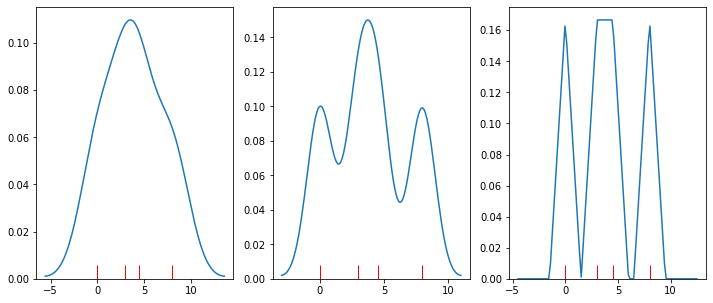

In [84]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})

**Plot discrete quantitative data as a bar chart** <br>
* when plotting discrete (non-continuous values), it's possible to select either a histogram or a bar chart to depict the data
* histogram is the most immediate choice since the data is numeric, but will be plotting in a way that is like a bar chart since the data isn't continuous.
* since discrete data points fall on set values (bar-width) & bins exclude the upper limit, the data will appear to the right of it's data point. it can help to reduce ambiguity by putting bin edges between the actual values taken by the data
* can also be helpful to plot non-connected bins
* even if your data is technically discrete numeric, you should probably not consider this variant unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues
* it might be tempting to use seaborn's countplot function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. (For example, if the unique values were {1, 2, 4, 5}, missing 3, countplot would only plot four bars, with the bars for 2 and 4 right next to one another.) 
* While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.

In [71]:
die_rolls = pd.read_csv('./resources/die-rolls.csv')

# A fair dice has six-faces having numbers [1-6]. 
# There are 100 dices, and two trials were conducted.
# In each trial, all 100 dices were rolled down, and the outcome [1-6] was recorded.
# The `Sum` column represents the sum of the outcomes in the two trials, for each given dice. 
die_rolls.head(10)

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9
5,6,6,6,12
6,7,3,3,6
7,8,3,2,5
8,9,2,6,8
9,10,6,6,12


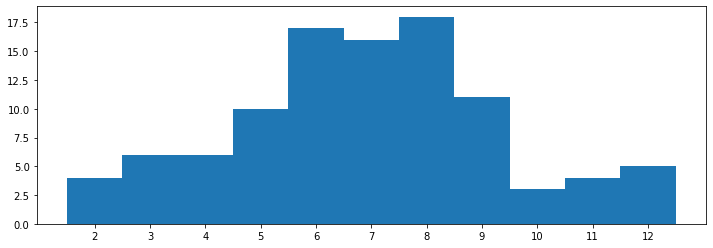

In [72]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

**Plot gaps between bars for discrete data as a bar chart** <br>
* With "rwidth" param set to 0.7, the bars will take up 70% of the space allocated by each bin, with 30% of the space left empty. This changes the default display of the histogram (which you could think of as "rwidth = 1") into a bar chart.
* By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.
* For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value. 

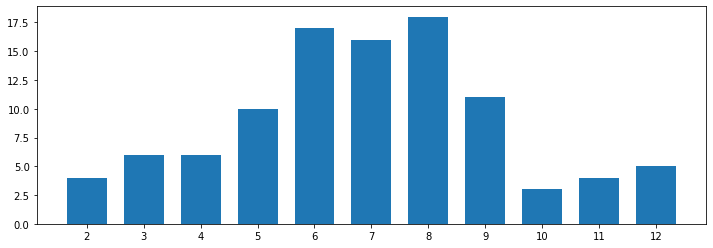

In [73]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

**Change axis limit to plot specific parts of data** <br>
* while creating plots & performing explorations, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. 
* Note any aspects of the data like the number of modes and skew, and note the presence of outliers in the data for further investigation.
 * in historgrams, one of the most salient bits of info you can observe are if there are outliers in your data
 * if plot has unexpected range, this can show which areas need further investigation
 * if data is highly skewed, you might want ignore outliers & zoom into the parts of the data that are more interesting
* the use of axis limits can allow focusing on data points in that range without needing to go through the creation of new DataFrame filtering out the data points
* to change a histogram's axis limits, you can add a Matplotlib xlim() call to your code. 
 * The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range.
 * might also adjust the bin size to account for reduced axis limit

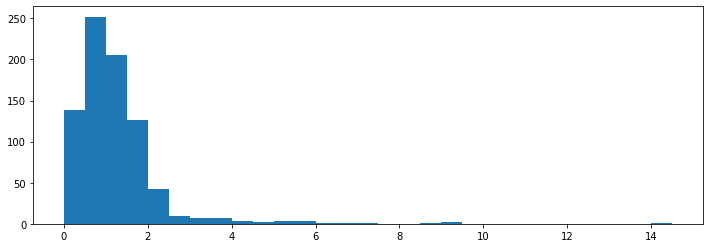

In [74]:
# first show plot of skewed data (height column in the pokemon dataset)

# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

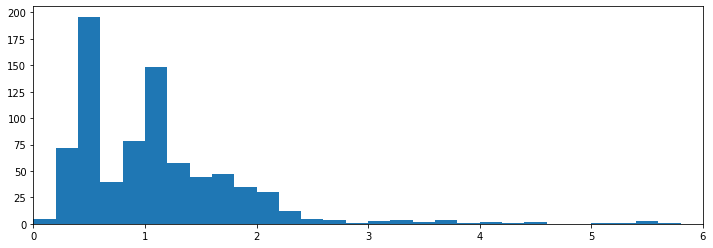

In [75]:
# then choose which parts of the data you want to zoom in on

# change the bin size in anticipation of the reduced axis limit
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

## Histogram Scale Transformations
* the standard assumption is that data should be interpreted linearly, with differences being the most salient points of attention
* in other cases, you might be interested in differences in terms of ratios or percentages
* most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution
* classic example of a variable that might require a different scale is data dealing with finance, which tend to have a range that crosses many orders of magnitude & are usually skewed to the right
 * with a linear model, it may be difficult for a predictor variable to capture small differences at the low end of the scale at the same as large distances on the high end
 * the transformation that would best be applied is a logarithmic scaling, so that distances on the scaled axis represent multiplicative differences instead of arithmetic differences

![title](./resources/log-figure.png)

* instead of tick marks increasing by 40k of the previous, each tick mark is twice the number of the previous
* results tend to create a Log-normal Distribution where the data looks approximately normal shaped after a log transform
* under this transformation, linear changes in predictor features will result in multiplicative effects in the price
* NOTE: all values must be positive to use a log transform
* can also transform data directly instead & then plot linearly, but axis transformations are more useful because you can interpret data with their naturally recorded units without having to mentally apply the inverse transformation during interpretation

**Scale the x-axis to log-type & update axis limits accordingly** <br>
* in addition to scaling the axis, we need to adjust the bins & labels
* Between integer powers of 10, we don't have clean values for even markings, but we can still get close: Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.
 * a 3 is about half way between consecutive powers of 10 on a log scale
* It is important that the xticks() are specified after xscale() since that function has its own built-in tick settings.

In [80]:
# first find the bin limits by transforming the describe() to a scale of log10
# the orignal data had a minimum of 0.1 & a max of 999.9 which is a log10 min of -1 & max of near 3
# these give the limits for the bins
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

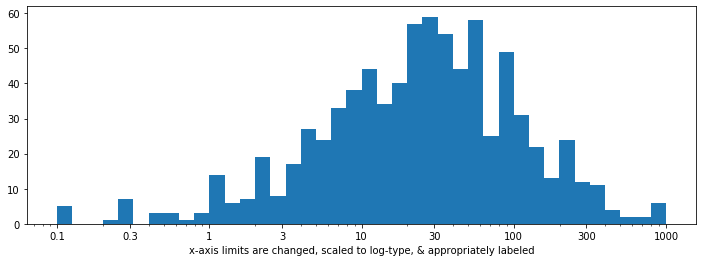

In [81]:
# Axis transformation

# Bin size attained by taking the min & max of the log (-1 & 3)
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-tick labels by doing some hardcoding since, outside of the whole powers of 10,
# there aren't nice evenly spaced intermediate values. 
# A 3 is about half half way between consecutive posers of 10 on a log scale
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log');

# Apply x-ticks
plt.xticks(ticks, labels);

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, scaled to log-type, & appropriately labeled');

**Custom scale given data Series, instead of using the built-in log scale** <br>
* if you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. 
* In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. 
 * The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. 
* For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. 
 * Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension. We can create a visualization on this transformed scale like this:

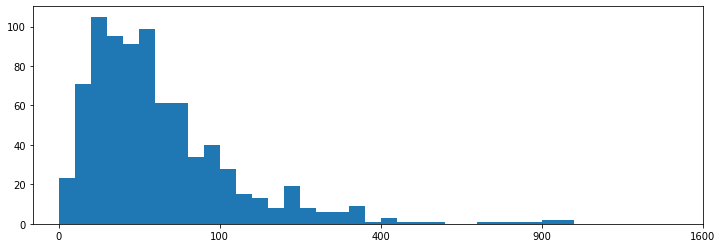

In [83]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
# Note that data is a pandas Series, so we can use the apply method for the function. If it were a NumPy Array, we would need to apply the function like in the other cases. 
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
# The tick locations could have also been specified with the natural values, where we apply the standard transformation function on the first argument of xticks instead.
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

# Figures, Axes, & Subplots
The base of visualization in Matplotlib & Seaborn is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. Matplotlib/Seaborn create the Figure & Axes objects implicitly with each function automatically targeting a Figure or Axes that was most recently worked with. But you can also explicitly set up a Figure, Axes, & plot. Subplots are groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts.

![title](./resources/mpl-figure.png)

**Create plot explicitly with Matplotlib** <br>
1. Create Figure obj
2. Create Axes obj: One of the Figure methods is .add_axes(), which creates a new Axes object in the Figure & requires one list as argument specifying the dimensions of the Axes
 1. the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) 
 2. the last two elements specifying the Axes width and height, respectively. 
3. Finally, we use the Axes method .hist() (or whichever structure) just like we did before with plt.hist().

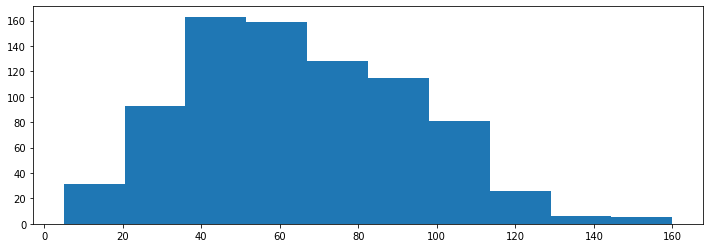

In [65]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

**Create plot explicity with Seaborn** <br>
1. Same first 2 steps above
2. Pass in Axes object as a parameter to the regular Seaborn function

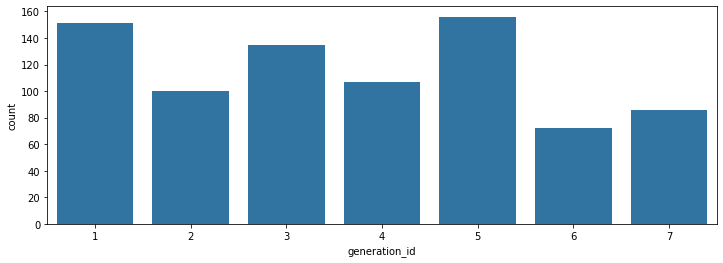

In [66]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)

**Create Subplots side-by-side** <br>
example puts two plots side by side through use of the figure() & subplot() functions
* figure(): creates a Figure object
 * "figsize" param sets width & height enabling a larger figure to support multiple subplots.
* subplot(): creates an Axes in the Figure. Args specify the number of rows, columns, and index of the active subplot (in that order).
 * first two arguments says to divide the figure into one row and two columns
 * third argument says to create a new Axes in the n slot. Slots indices are numbered from left to right in rows from top to bottom & start at 1 instead of 0

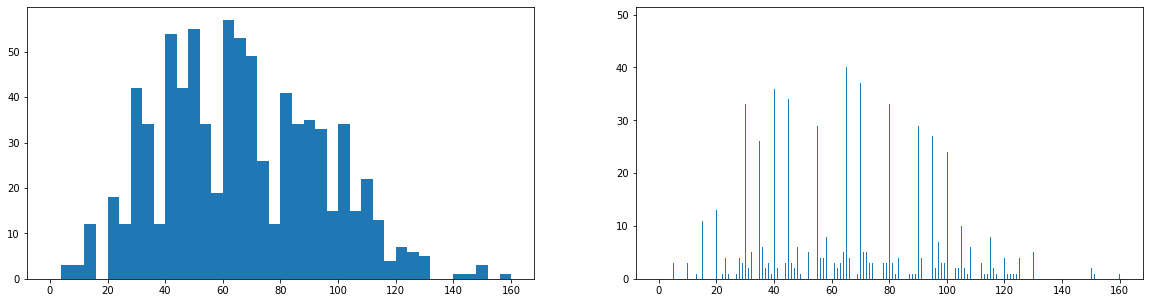

In [63]:
# Resize the chart, and have two plots side-by-side

# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2) 
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

**Create subplots overlaping** <br>
Only create 1 subplot but two plots

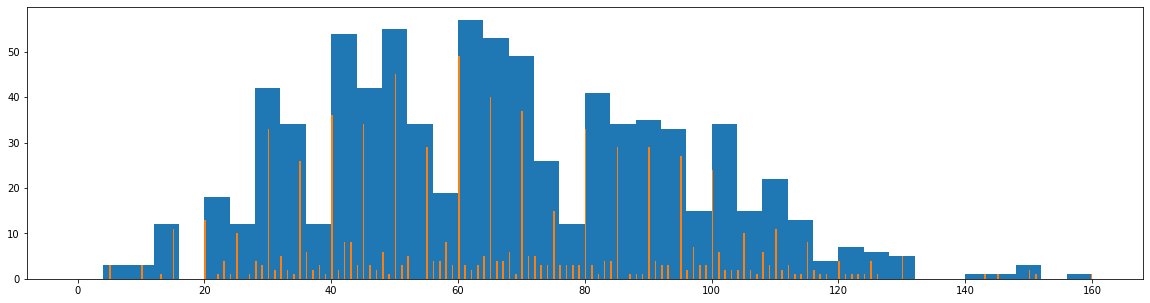

In [68]:
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 1, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

**Other functions for getting & setting** <br>
* if you don't assign Axes objects as they're created, you can retrieve the current Axes using ax = plt.gca()
* set current Axes using plt.sca()
* get a list of all Axes in a Figure fig by using axes = fig.get_axes()
* can create subplots, you can use fig.add_subplot() in the same way as plt.subplot()

**Create subplot grid** <br>
As a special note for the text, the Axes limits are [0,1] on each Axes by default, and we increment the iterator counter i by 1 to get the subplot index, if we were creating the subplots through subplot()

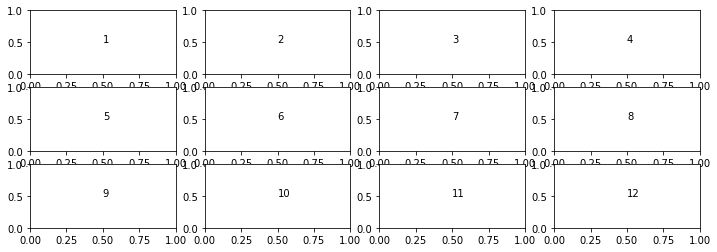

In [70]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes